# Get Ready ... Initial Statistics.

In [1]:
import os
import re
import glob
import langid
import random
import string
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
os.chdir("App reviews procession and classification")

In [2]:
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
dfr=pd.DataFrame()
for i in category:
    file=glob.glob("**/*newest*"+i+"*.csv", recursive=True)
    file.sort() 
    dff = pd.DataFrame()
    for f in range(len(file)):
        onef=pd.read_csv(file[f])
        onef["datetime"]=file[f][:10]
        dff=pd.concat([dff,onef],ignore_index=True)
    dff["category"]=i
    dfr=pd.concat([dfr,dff],ignore_index=True)
dfr.to_csv("all_data_review.csv",index=None)

In [3]:
len(dfr.index)

2715303

In [5]:
#datar= pd.read_csv('all_data_review.csv')
datar=dfr.copy()
datar["id"]=range(len(datar.index))
datar.head(10)

,appTitle,userName,date,score,text,datetime,category,id
0,Photomath,NaN,"March 8, 2019",5,nice,2019-03-08,EDUCATION,0
1,Photomath,NaN,"March 8, 2019",4,very helpful,2019-03-08,EDUCATION,1
2,Photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,2019-03-08,EDUCATION,2
3,Photomath,NaN,"March 8, 2019",5,great!!!,2019-03-08,EDUCATION,3
4,Photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,2019-03-08,EDUCATION,4
5,Photomath,Sheryl Thomas,"March 8, 2019",5,amazing,2019-03-08,EDUCATION,5
6,Photomath,אוביידו אדריאנה,"March 8, 2019",5,"Great tool for learning math, I love it!",2019-03-08,EDUCATION,6
7,Photomath,Ramadhan,"March 8, 2019",5,mantap sangat gan... membantu belajar anda,2019-03-08,EDUCATION,7
8,Photomath,Rohit Das,"March 8, 2019",5,perfect app,2019-03-08,EDUCATION,8
9,Photomath,Kaleb Wallis,"March 8, 2019",5,great if your in school or have homework,2019-03-08,EDUCATION,9


In [6]:
#1.unique reviews
datar1=datar.copy()
datar1.drop_duplicates(subset=['appTitle','userName','date','score','text','category'],inplace=True)
len(datar1.index)

1478938

In [7]:
#2.unique apps
datar1["appTitle"].nunique()

87

In [8]:
a=[]
for i in range(len(category)):
    b=datar1[datar1["category"]==category[i]]["appTitle"].unique()
    for j in b:
        a.append(j)
def printRepeating(arr, size): 
    print("Repeating elements are ", end = '') 
    for i in range (0, size): 
        for j in range (i + 1, size): 
            if arr[i] == arr[j]: 
                print(arr[i],i,j, end = ' ') 
printRepeating(a,len(a))

Repeating elements are Duolingo: Learn Languages Free 2 66 

In [9]:
#apps in each of the 8 specified app categories
datar1.groupby(["category"]).nunique()["appTitle"]

category
EDUCATION             10
ENTERTAINMENT         14
FAMILY                10
FINANCE               10
GAME_ACTION           11
HEALTH_AND_FITNESS    10
LIFESTYLE             12
MUSIC_AND_AUDIO       11
Name: appTitle, dtype: int64

In [10]:
#3. reviews exist in each of the eight app-categories
datar1.groupby(["category"]).size()

category
EDUCATION             137227
ENTERTAINMENT         226723
FAMILY                167172
FINANCE               185512
GAME_ACTION           252986
HEALTH_AND_FITNESS    154330
LIFESTYLE             137751
MUSIC_AND_AUDIO       217237
dtype: int64

In [12]:
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
df2 = pd.DataFrame()
for i in category:
    files=glob.glob("**/*detailed*"+i+"*.csv", recursive=True)
    df1=pd.concat([pd.read_csv(f,sep=",",encoding='unicode_escape') for f in files],ignore_index=True)
    df1["category"]=i 
    df2=pd.concat([df2,df1]) 
df2.to_csv("all_data_detail.csv",index=None)

/Users/ty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [13]:
#datad= pd.read_csv("all_data_detail.csv")
datad=df2.copy()
datad.head(10)

,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,...,reviews,score,scoreText,size,summary,title,updated,url,version,category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2853869.0,4.72003,NaN,Varies with device,"Learn English, Spanish, French, German, Italia...",NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,Varies with device,EDUCATION
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,402019.0,4.69062,NaN,Varies with device,Scan. Solve. Learn.,NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,Varies with device,EDUCATION
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46975.0,4.49254,NaN,22M,School Communication,NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,10.0.4.33635,EDUCATION
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18948.0,4.23523,NaN,Varies with device,"Create and play quizzes on the go, have fun an...",NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,Varies with device,EDUCATION
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23256.0,4.23093,NaN,Varies with device,Connect with your classes and do assignments o...,NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,Varies with device,EDUCATION
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18174.0,4.28686,NaN,56M,ABCmouse offers a full online learning program...,NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,7.13.0,EDUCATION
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59104.0,4.39381,NaN,47M,ClassDojo is a beautiful communication app for...,NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,4.49.2,EDUCATION
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8691.0,4.2147,NaN,Varies with device,"Stream TV Shows, Full Episodes, Live TV &amp; ...",NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,Varies with device,EDUCATION
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90956.0,4.65198,NaN,Varies with device,"The top study app for flashcards, languages an...",NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,Varies with device,EDUCATION
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5276.0,4.47584,NaN,26M,&#39;Baby Shark&#39; with over 3 billion views...,NaN,1.550000e+12,https://play.google.com/store/apps/details?id=...,19,EDUCATION


In [14]:
#4.different contentRating groups in each app-category
tmp=datad[["category","contentRating"]]
tmp=tmp.dropna()
datad1=tmp["contentRating"].groupby(tmp["category"]).unique()
datad1

category
EDUCATION                               [Everyone]
ENTERTAINMENT         [Teen, Everyone, Mature 17+]
FAMILY                    [Everyone 10+, Everyone]
FINANCE                                 [Everyone]
GAME_ACTION           [Everyone, Teen, Mature 17+]
HEALTH_AND_FITNESS                      [Everyone]
LIFESTYLE             [Everyone, Mature 17+, Teen]
MUSIC_AND_AUDIO                   [Teen, Everyone]
Name: contentRating, dtype: object

In [15]:
#5.apps exist in each of these contentRating-sub-groups in each app-category?
datad.groupby(["category","contentRating"]).nunique()["appTitle"]

category            contentRating
EDUCATION           Everyone         10
ENTERTAINMENT       Everyone          4
                    Mature 17+        1
                    Teen              9
FAMILY              Everyone          7
                    Everyone 10+      3
FINANCE             Everyone         10
GAME_ACTION         Everyone          5
                    Mature 17+        2
                    Teen              4
HEALTH_AND_FITNESS  Everyone         10
LIFESTYLE           Everyone         11
                    Mature 17+        1
                    Teen              1
MUSIC_AND_AUDIO     Everyone          2
                    Teen              9
Name: appTitle, dtype: int64

In [16]:
#merge
tmp=datad[["contentRating","appTitle"]]
tmp=tmp.dropna()
datam=pd.merge(datar1,tmp, on="appTitle", how="left")
datam.drop_duplicates(subset=['appTitle','id'],inplace=True)

In [17]:
#6.How many reviews in each contentRating-sub-groups in each app-category
datam.groupby(["category","contentRating"]).count()["text"]

category            contentRating
EDUCATION           Everyone          95916
ENTERTAINMENT       Everyone          14377
                    Mature 17+         7278
                    Teen             126220
FAMILY              Everyone          67879
                    Everyone 10+      48107
FINANCE             Everyone         133759
GAME_ACTION         Everyone          87560
                    Mature 17+        29359
                    Teen              92574
HEALTH_AND_FITNESS  Everyone         109859
LIFESTYLE           Everyone          70280
                    Mature 17+        21716
MUSIC_AND_AUDIO     Everyone          22754
                    Teen             141177
Name: text, dtype: int64

# Text Pre-processing

In [18]:
datar2=datam.copy()

In [19]:
#Remove the non-English reviews.
import langid
eng=[]
tmp=datar2["text"].astype(str)
for i in tmp:
    eng.append(langid.classify(i)[0])

In [20]:
engc=[]
datar2["processed_text"]=datar2["text"]
for i in range(len(eng)):
    if eng[i] !="en" :
        engc.append(datar2.index[i])
#datar2.loc[engc,"processed_text"] = np.nan
datar2=datar2.drop(engc)

In [21]:
#Remove the non-ASCII characters
datar2["processed_text"]=datar2['processed_text'].str.encode('ascii', 'ignore').str.decode('ascii')

In [22]:
#Remove punctuations
import string
tmp=datar2["processed_text"].astype(str)
datar2["processed_text"]=tmp.str.replace("[{}]".format(string.punctuation), "")

In [24]:
#Remove multiple characters if they occur more than 2 times continuously.
import re
y=lambda x : re.sub(r'(.)\1+', r'\1\1',x)  
tmp=datar2["processed_text"].astype(str)
tmp=tmp.apply(y)
datar2["processed_text"]=tmp

In [26]:
#Remove the reviews that have two or less number of words.
c2=[]
tmp=np.array(datar2["processed_text"].astype(str))
for i in range(len(tmp)):
    sp=tmp[i].split()
    if len(sp)<=2:
        #tmp[i]=np.nan
        c2.append(datar2.index[i])
#datar2["processed_text"]=tmp
datar2=datar2.drop(c2)

In [27]:
#How many reviews exist in each of the eight app-categories? Compare with question 3.
tmp=datar2[["processed_text","category"]]
tmp=tmp.dropna()
tmp.groupby(["category"]).size()

category
EDUCATION              93530
ENTERTAINMENT         126159
FAMILY                109821
FINANCE               123519
GAME_ACTION           127306
HEALTH_AND_FITNESS    108325
LIFESTYLE              87075
MUSIC_AND_AUDIO       138319
dtype: int64

In [28]:
#How many reviews in each contentRating-sub-groups in each app-category? 
datar2.groupby(["category","contentRating"]).count()["text"]

category            contentRating
EDUCATION           Everyone         65632
ENTERTAINMENT       Everyone          9387
                    Mature 17+        4685
                    Teen             65985
FAMILY              Everyone         42430
                    Everyone 10+     34224
FINANCE             Everyone         86965
GAME_ACTION         Everyone         50101
                    Mature 17+       10743
                    Teen             43901
HEALTH_AND_FITNESS  Everyone         76381
LIFESTYLE           Everyone         42566
                    Mature 17+       13673
MUSIC_AND_AUDIO     Everyone         15041
                    Teen             88508
Name: text, dtype: int64

In [29]:
len(datar2.index)

914054

In [62]:
#datar2.to_csv("data2.csv",index=None)
#datar2=pd.read_csv("data2.csv")

# Analyzing Each Category

In [34]:
datar3=pd.read_csv("data2.csv")

In [31]:
#10.What is the number of reviews for each score (score column)
datasi=datar3.groupby(["category","score"]).count()["id"]
datasi

category            score
EDUCATION           1         8841
                    2         2381
                    3         4447
                    4        10283
                    5        67578
ENTERTAINMENT       1        19091
                    2         5783
                    3         8661
                    4        16446
                    5        76178
FAMILY              1        11948
                    2         3333
                    3         5755
                    4        12217
                    5        76568
FINANCE             1        26248
                    2         4859
                    3         4916
                    4        10457
                    5        77039
GAME_ACTION         1        18098
                    2         3953
                    3         6482
                    4        13046
                    5        85727
HEALTH_AND_FITNESS  1        19181
                    2         6152
                    3        

In [35]:
#11.How many apps exist in each score-sub-group?
datasa=datar3.groupby(["category","score"]).nunique()["appTitle"]
datasa

category            score
EDUCATION           1        10
                    2        10
                    3        10
                    4        10
                    5        10
ENTERTAINMENT       1        14
                    2        14
                    3        14
                    4        14
                    5        14
FAMILY              1        10
                    2        10
                    3        10
                    4        10
                    5        10
FINANCE             1        10
                    2        10
                    3        10
                    4        10
                    5        10
GAME_ACTION         1        11
                    2        11
                    3        11
                    4        11
                    5        11
HEALTH_AND_FITNESS  1        10
                    2        10
                    3        10
                    4        10
                    5        10
LIFESTYLE     

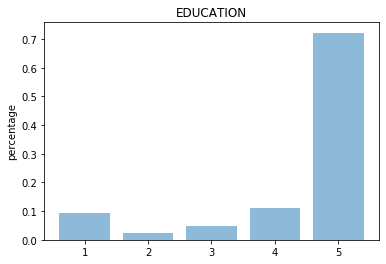

In [36]:
#12.Compare the number of reviews for each score in a plot
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
norm0 = [float(i)/sum(datasi[0:5]) for i in datasi[0:0+5]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm0, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[0])
plt.show()

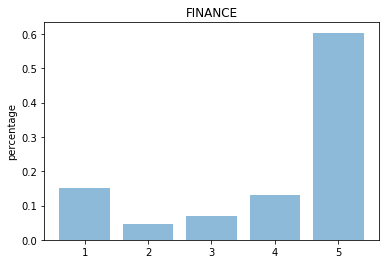

In [37]:
norm1 = [float(i)/sum(datasi[5:5+5]) for i in datasi[5:5+5]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm1, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[1])
plt.show()

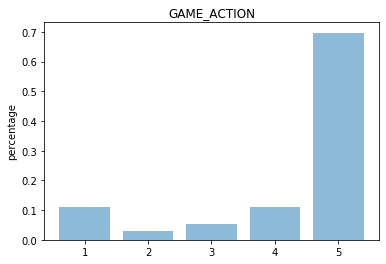

In [38]:
norm2 = [float(i)/sum(datasi[10:15]) for i in datasi[10:10+5]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm2, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[2])
plt.show()

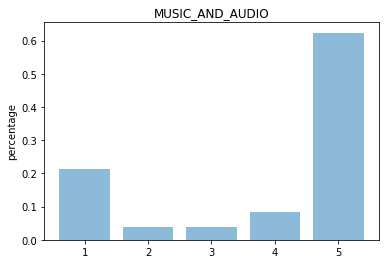

In [39]:
norm3 = [float(i)/sum(datasi[15:20]) for i in datasi[15:20]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm3, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[3])
plt.show()

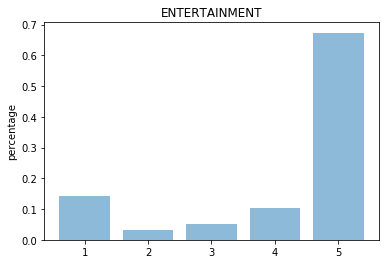

In [40]:
norm4 = [float(i)/sum(datasi[20:25]) for i in datasi[20:25]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm4, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[4])
plt.show()

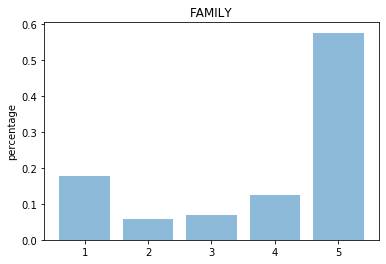

In [41]:
norm5 = [float(i)/sum(datasi[25:30]) for i in datasi[25:30]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm5, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[5])
plt.show()

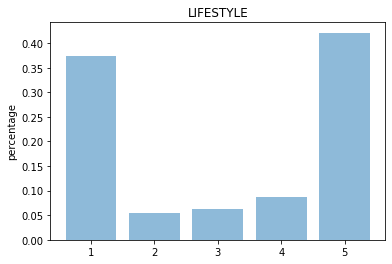

In [42]:
norm6 = [float(i)/sum(datasi[30:35]) for i in datasi[30:35]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm6, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[6])
plt.show()

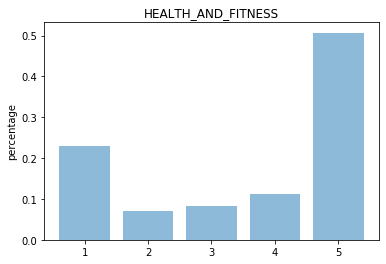

In [43]:
norm7 = [float(i)/sum(datasi[35:40]) for i in datasi[35:40]]
y_pos = np.arange(5)
xname=["1","2","3","4","5"]
plt.bar(y_pos, norm7, align='center', alpha=0.5)
plt.xticks(y_pos,xname)
plt.ylabel('percentage')
plt.title(category[7])
plt.show()

In [44]:
#13.What is the average length of the reviews in each score-sub-group
tmp=datar3.copy()
tmp["processed_text"]=tmp["processed_text"].astype(str)
tmp["len"]=tmp["processed_text"].apply(lambda x: len(x))
#print(tmp)
datalm=tmp.groupby(["category","score"]).mean()["len"]
datar3["len"]=tmp["len"]
datalm

category            score
EDUCATION           1        109.378238
                    2        161.391852
                    3        125.079379
                    4        100.471166
                    5         66.014250
ENTERTAINMENT       1        111.040228
                    2        129.094069
                    3        108.132202
                    4         82.181199
                    5         55.396112
FAMILY              1        103.569384
                    2        134.459646
                    3        116.544917
                    4        104.633625
                    5         67.749647
FINANCE             1        158.836788
                    2        150.186870
                    3        124.812449
                    4         79.485703
                    5         55.284804
GAME_ACTION         1         83.861753
                    2        100.581837
                    3         76.729405
                    4         61.135137
              

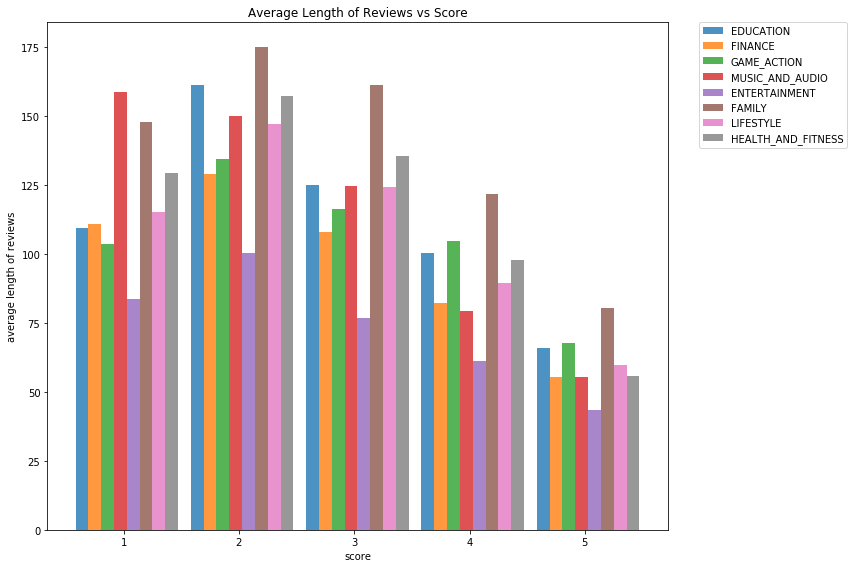

In [46]:
#14. Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a plot).
averagelen=np.array(datalm).reshape(8,5)
plt.figure(figsize=(12,8))
index = np.arange(len(averagelen[0]))
xname=["1","2","3","4","5"]
bar_width = 1/9
opacity = 0.8
error_config = {'ecolor': '0.8'}
rects1 = plt.bar(index, averagelen[0],bar_width, alpha=opacity,
                 yerr=None, error_kw=error_config, label=category[0])
rects2 = plt.bar(index + bar_width,averagelen[1], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[1])
rects3 = plt.bar(index + bar_width*2,averagelen[2], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[2])
rects4 = plt.bar(index + bar_width*3,averagelen[3], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[3])
rects5 = plt.bar(index + bar_width*4,averagelen[4], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[4])
rects6 = plt.bar(index + bar_width*5,averagelen[5], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[5])
rects7 = plt.bar(index + bar_width*6,averagelen[6], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[6])
rects8 = plt.bar(index + bar_width*7,averagelen[7], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[7])
plt.xticks(index + bar_width+0.25, xname)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Average Length of Reviews vs Score')
plt.xlabel('score')
plt.ylabel('average length of reviews')
plt.tight_layout()
plt.show()

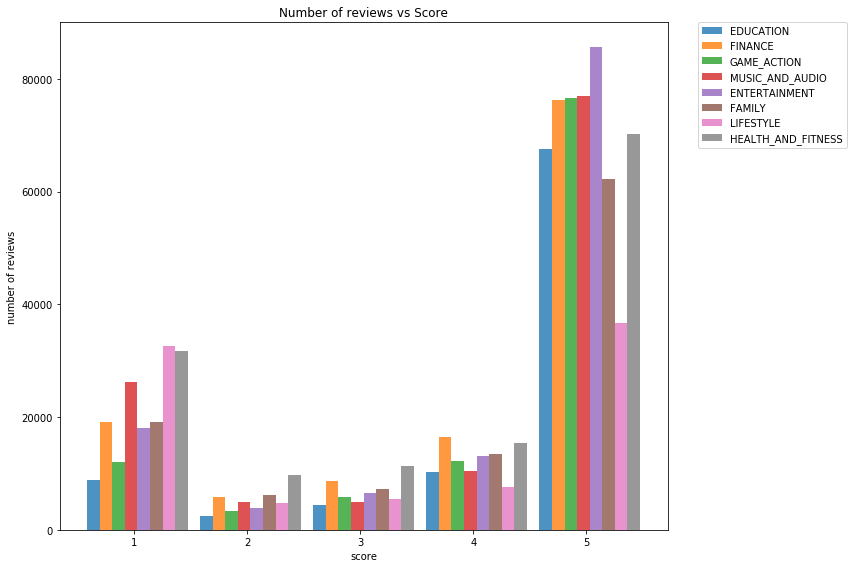

In [47]:
# 15. Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).
reviewscore=np.array(datasi).reshape(8,5)
plt.figure(figsize=(12,8))
index = np.arange(len(reviewscore[0]))
xname=["1","2","3","4","5"]
bar_width = 1/9
opacity = 0.8
error_config = {'ecolor': '0.8'}
rects1 = plt.bar(index, reviewscore[0],bar_width, alpha=opacity,
                 yerr=None, error_kw=error_config, label=category[0])
rects2 = plt.bar(index + bar_width,reviewscore[1], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[1])
rects3 = plt.bar(index + bar_width*2,reviewscore[2], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[2])
rects4 = plt.bar(index + bar_width*3,reviewscore[3], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[3])
rects5 = plt.bar(index + bar_width*4,reviewscore[4], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[4])
rects6 = plt.bar(index + bar_width*5,reviewscore[5], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[5])
rects7 = plt.bar(index + bar_width*6,reviewscore[6], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[6])
rects8 = plt.bar(index + bar_width*7,reviewscore[7], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[7])
plt.xticks(index + bar_width+0.25, xname)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of reviews vs Score')
plt.xlabel('score')
plt.ylabel('number of reviews')
plt.tight_layout()
plt.show()

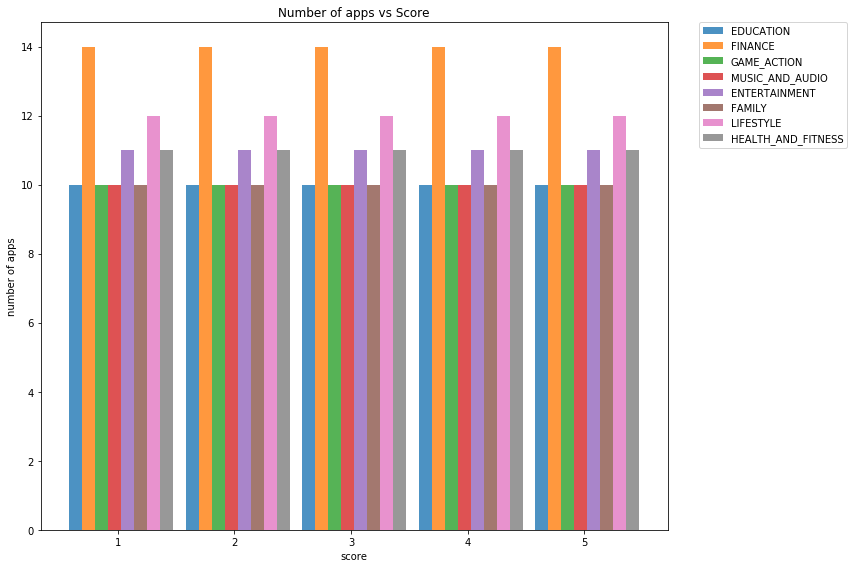

In [48]:
#16. Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).
appscore=np.array(datasa).reshape(8,5)

plt.figure(figsize=(12,8))
index = np.arange(len(appscore[0]))
xname=["1","2","3","4","5"]
bar_width = 1/9
opacity = 0.8
error_config = {'ecolor': '0.8'}
rects1 = plt.bar(index, appscore[0],bar_width, alpha=opacity,
                 yerr=None, error_kw=error_config, label=category[0])
rects2 = plt.bar(index + bar_width,appscore[1], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[1])
rects3 = plt.bar(index + bar_width*2,appscore[2], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[2])
rects4 = plt.bar(index + bar_width*3,appscore[3], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[3])
rects5 = plt.bar(index + bar_width*4,appscore[4], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[4])
rects6 = plt.bar(index + bar_width*5,appscore[5], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[5])
rects7 = plt.bar(index + bar_width*6,appscore[6], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[6])
rects8 = plt.bar(index + bar_width*7,appscore[7], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label=category[7])
plt.xticks(index + bar_width+0.25, xname)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of apps vs Score')
plt.xlabel('score')
plt.ylabel('number of apps')
plt.tight_layout()
plt.show()

# Correlation Analysis

In [49]:
#datar3.to_csv("data3.csv",index=None)
#datar4=pd.read_csv("data3.csv")
datar4=datar3.copy()

In [50]:
func=lambda x : x.corrwith(x["len"],axis=0)
datar4.groupby(["category"]).apply(func)["score"]

category
EDUCATION            -0.216824
ENTERTAINMENT        -0.285170
FAMILY               -0.176173
FINANCE              -0.432277
GAME_ACTION          -0.237993
HEALTH_AND_FITNESS   -0.274127
LIFESTYLE            -0.262165
MUSIC_AND_AUDIO      -0.347001
Name: score, dtype: float64

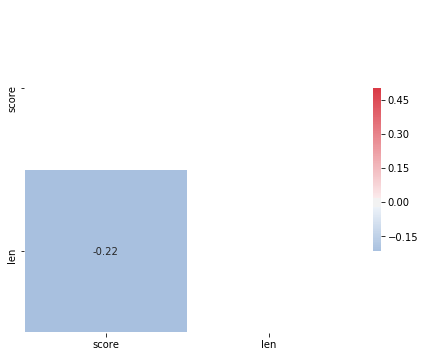

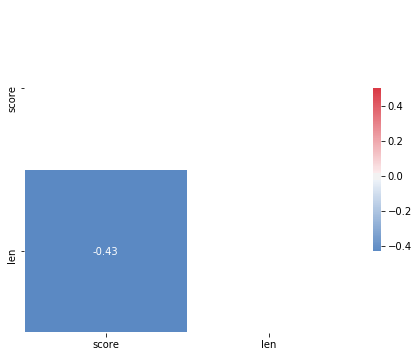

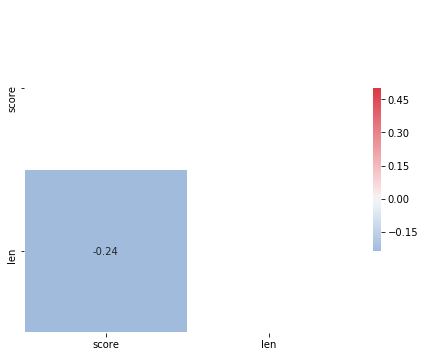

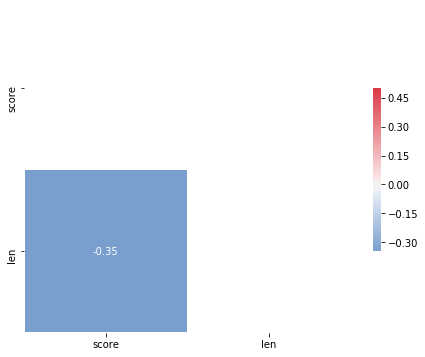

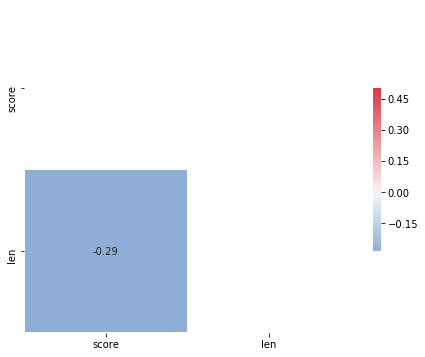

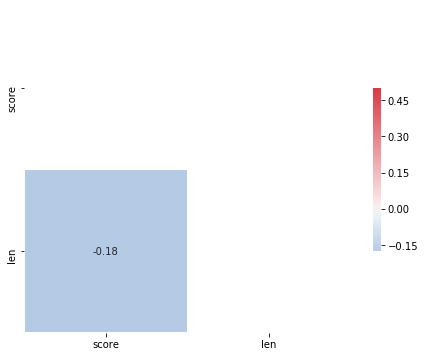

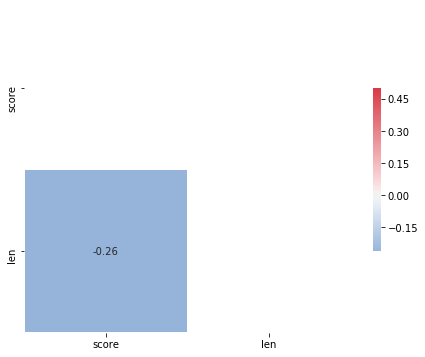

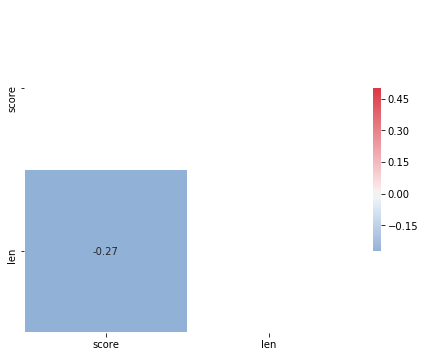

In [51]:
import seaborn as sns
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
for i in category:
    corm0=datar4[(datar4["category"]==i)][["score","len"]].corr()
    mask = np.zeros_like(corm0, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(8, 6))
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    sns.heatmap(corm0, mask=mask,cmap=cmap,  vmax=0.5, center=0,annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Date-time Analysis

In [52]:
#18. Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.
import datetime
datecc=np.array(datar4["datetime"])
for i in range(len(datecc)):
    datecc[i]=datetime.datetime.strptime(datecc[i], "%Y-%m-%d")
datar4["datetimec"]=datecc  


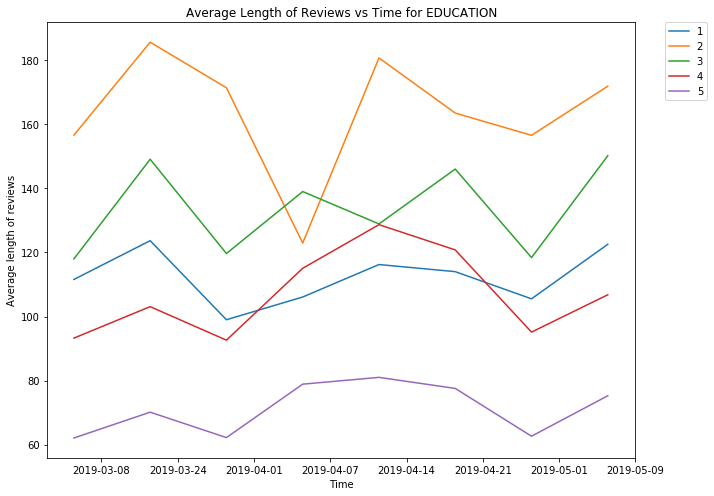

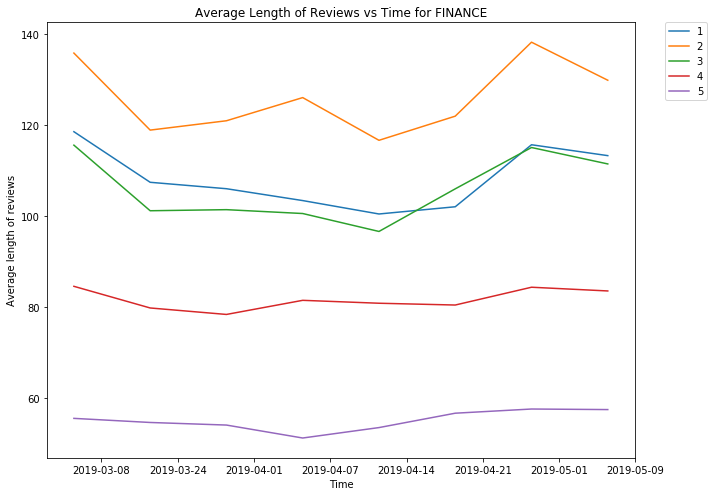

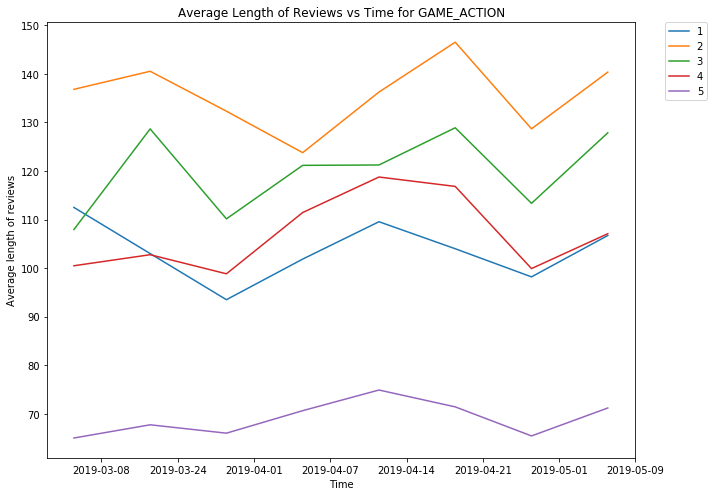

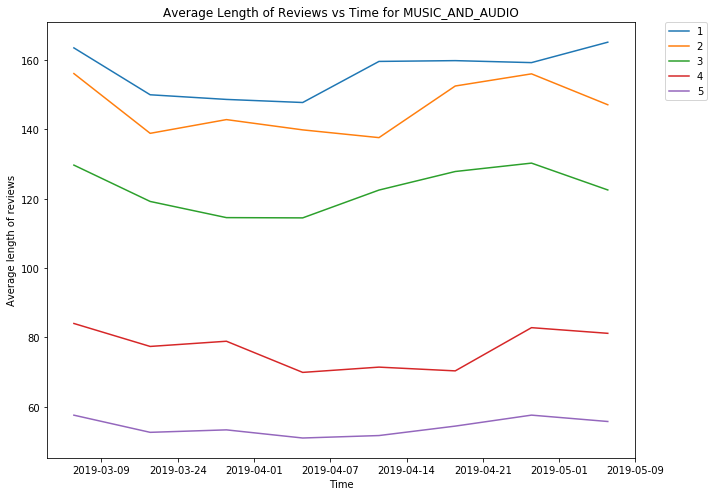

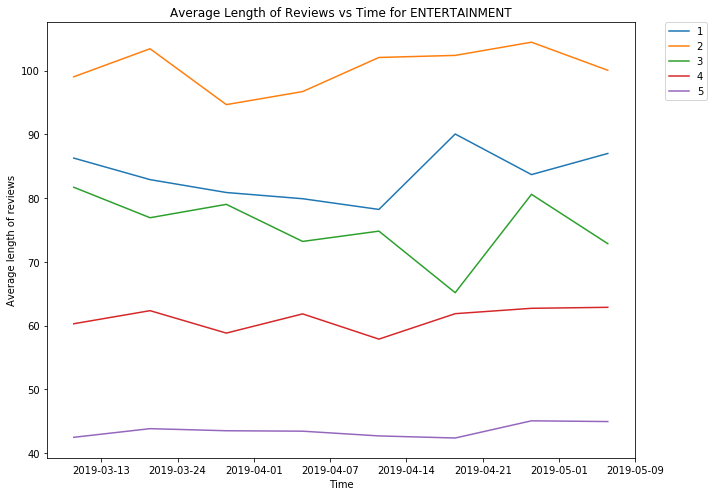

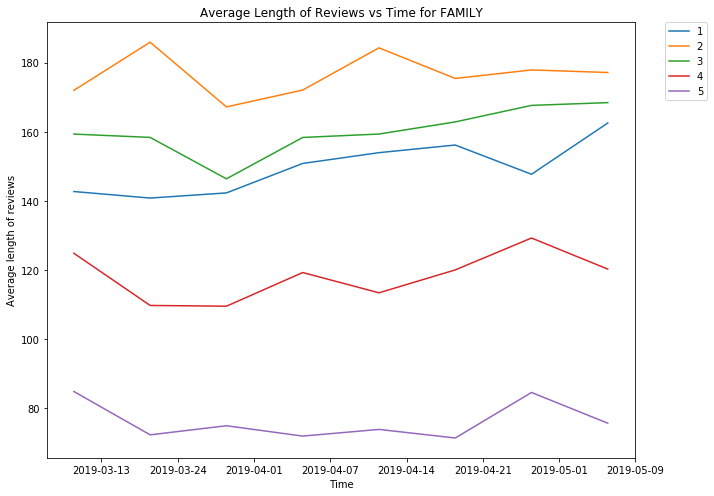

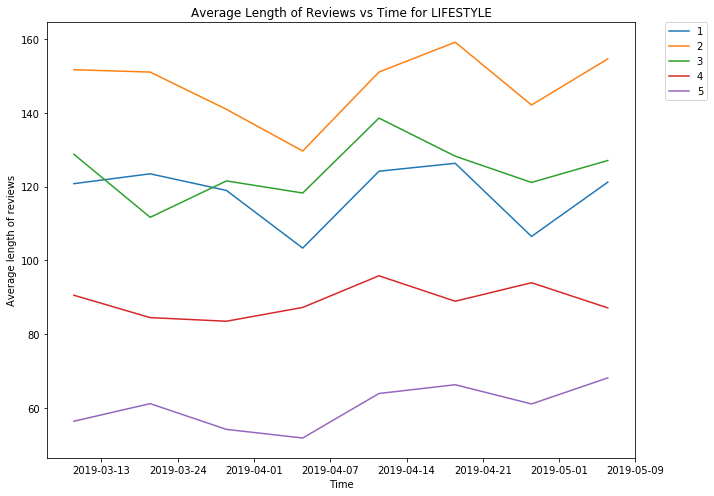

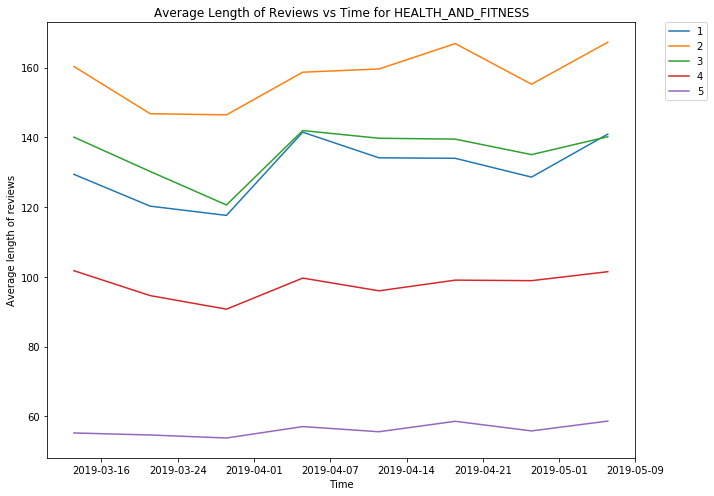

In [54]:
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
scoredate=datar4.groupby(["category","datetimec","score"]).mean()["len"]
for i in range(8):
    scoredatem=np.array(scoredate[i*40:i*40+40]).reshape(8,5).T
    plt.figure(figsize=(10,7))
    index = np.arange(len(scoredatem[0]))
    xname=datar4[datar4["category"]==category[i]]["datetime"].unique()
    rects1 = plt.plot(index, scoredatem[0],label="1")
    rects2 = plt.plot(index,scoredatem[1],label="2")
    rects3 = plt.plot(index ,scoredatem[2],label="3")
    rects4 = plt.plot(index ,scoredatem[3],label="4")
    rects5 = plt.plot(index ,scoredatem[4],label="5")
    plt.xticks(index + bar_width+0.25, xname)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title('Average Length of Reviews vs Time for {}'.format(category[i]))
    plt.xlabel('Time')
    plt.ylabel('Average length of reviews')
    plt.tight_layout()
    plt.show()

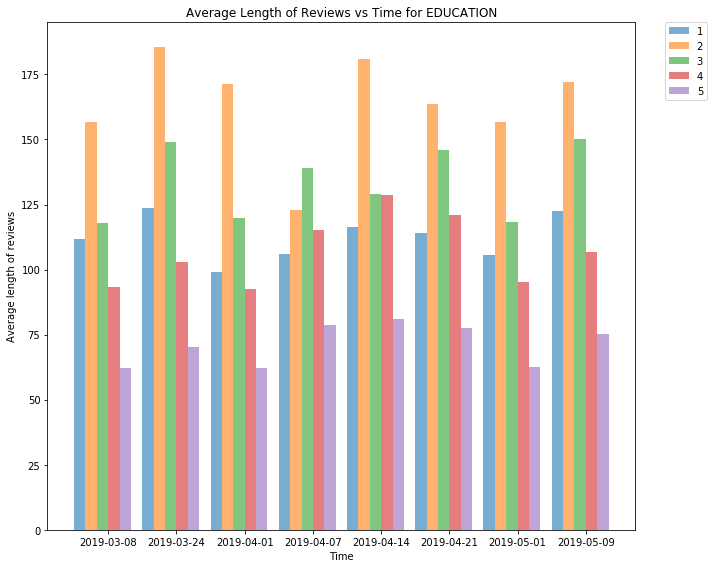

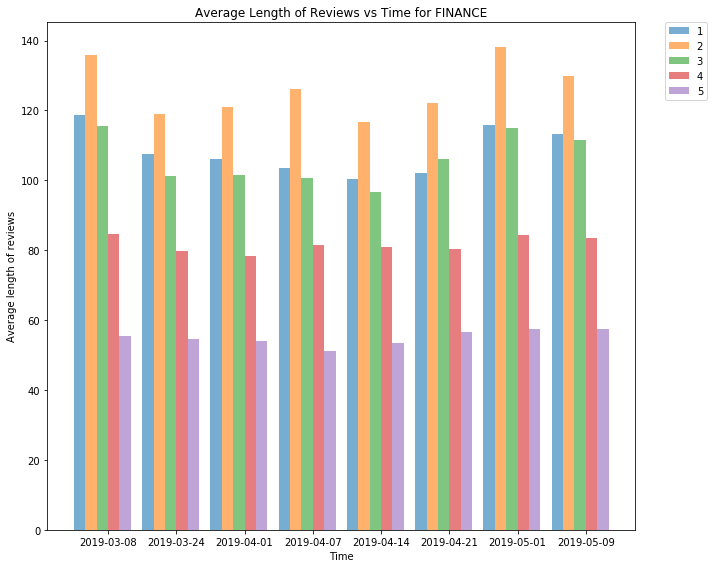

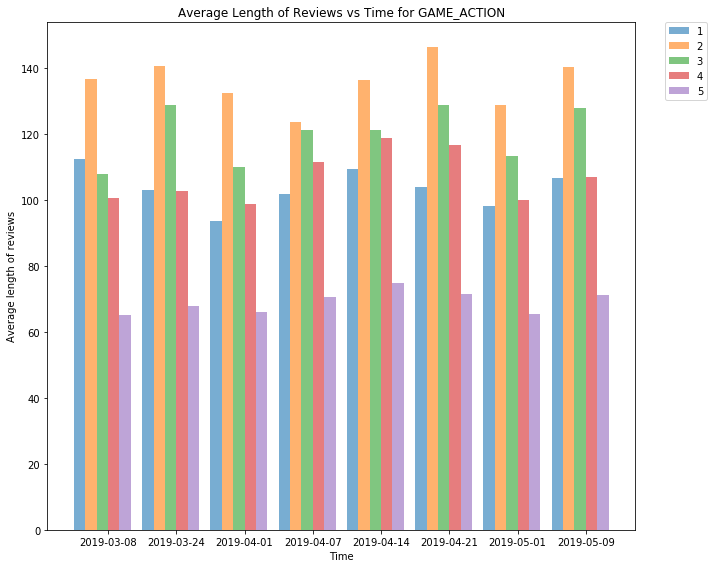

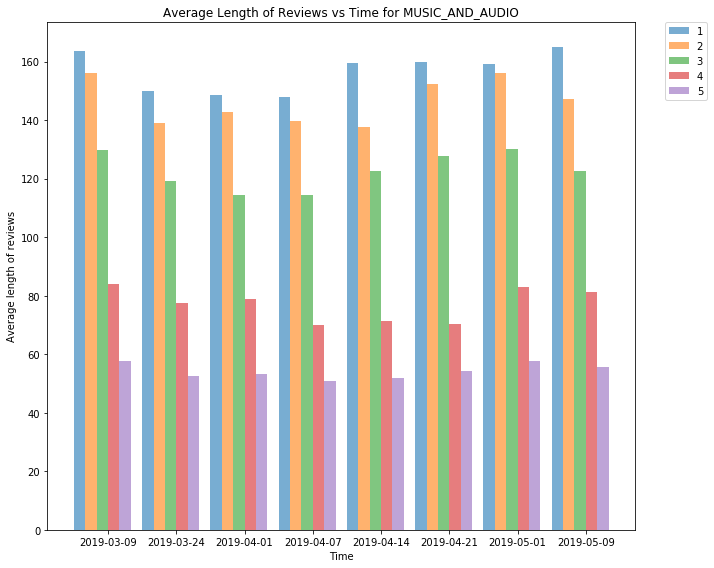

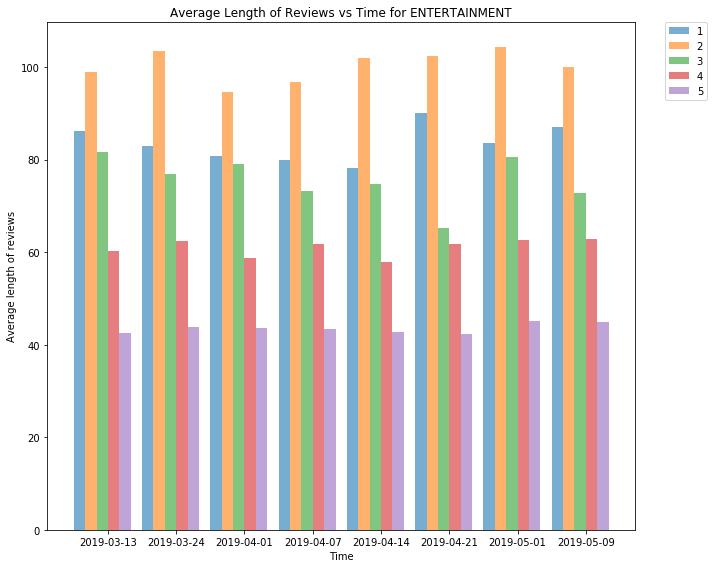

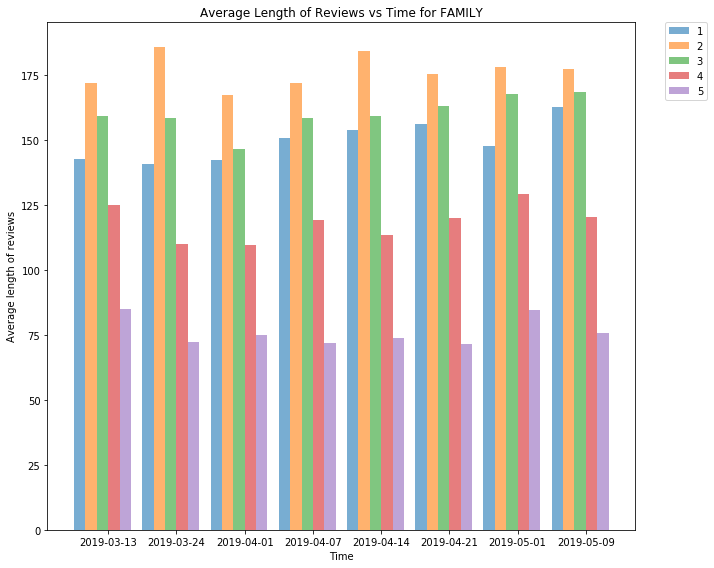

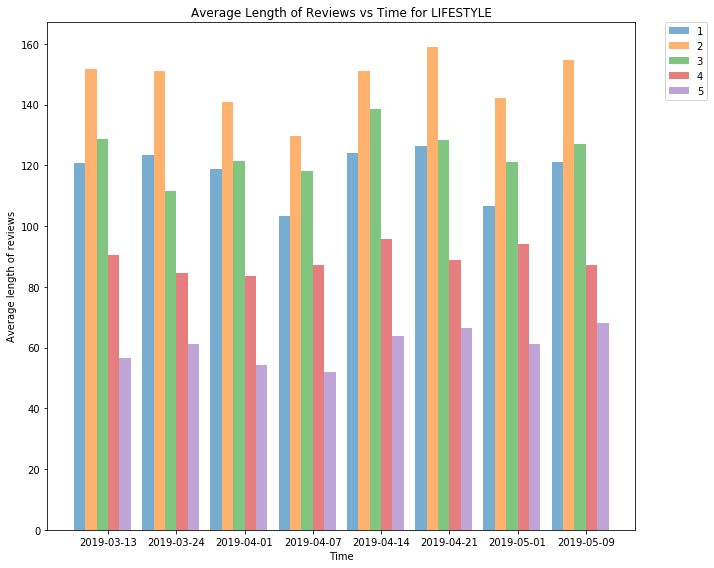

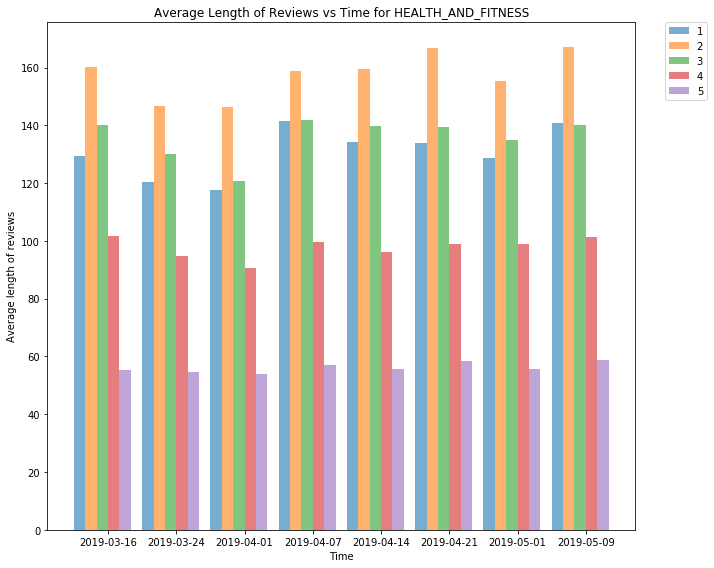

In [55]:
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
scoredate=datar4.groupby(["category","datetimec","score"]).mean()["len"]
for i in range(8):
    scoredatem=np.array(scoredate[i*40:i*40+40]).reshape(8,5).T
    plt.figure(figsize=(10,8))
    index = np.arange(len(scoredatem[0]))
    xname=datar4[datar4["category"]==category[i]]["datetime"].unique()
    bar_width = 1/6
    opacity = 0.6
    error_config = {'ecolor': '0.8'}
    rects1 = plt.bar(index, scoredatem[0],bar_width, alpha=opacity,
                 yerr=None, error_kw=error_config, label="1")
    rects2 = plt.bar(index + bar_width,scoredatem[1], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label="2")
    rects3 = plt.bar(index + bar_width*2,scoredatem[2], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label="3")
    rects4 = plt.bar(index + bar_width*3,scoredatem[3], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label="4")
    rects5 = plt.bar(index + bar_width*4,scoredatem[4], bar_width, alpha=opacity, 
                 yerr=None, error_kw=error_config, label="5")
    plt.xticks(index + bar_width+0.25, xname)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title('Average Length of Reviews vs Time for {}'.format(category[i]))
    plt.xlabel('Time')
    plt.ylabel('Average length of reviews')
    plt.tight_layout()
    plt.show()

# Manual evaluation

In [56]:
datar5_2=pd.read_csv("data2.csv")
import random

In [57]:
random.seed(100)
mychoice=pd.DataFrame()
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
for i in range(8):
    tmpc=datar5_2[datar5_2["category"]==category[i]].copy()
    for j in range(1,6):
        tmps=tmpc[tmpc["score"]==j].copy()
        #sampling = random.choices(tmps.index, k=5)
        sampling = random.sample(list(tmps.index), k=5)
        five=datar5_2.loc[sampling]
        mychoice=pd.concat([mychoice,five],ignore_index=True)
mychoice.to_csv("mychoice.csv",index=None)

In [58]:
mychoice1=pd.read_csv("mychoice1.csv",encoding='unicode_escape')

In [59]:
mychoice1.groupby(["category","Sentiment"]).size().unstack("Sentiment")

Sentiment,-5,-4,-3,-2,-1,0,1,2,3,4,5
category,,,,,,,,,,,
EDUCATION,1.0,NaN,3.0,NaN,1.0,5.0,NaN,NaN,4.0,3.0,8.0
ENTERTAINMENT,5.0,1.0,1.0,NaN,1.0,4.0,1.0,NaN,3.0,2.0,7.0
FAMILY,7.0,NaN,3.0,NaN,2.0,2.0,NaN,1.0,2.0,1.0,7.0
FINANCE,5.0,1.0,4.0,2.0,1.0,2.0,NaN,NaN,3.0,1.0,6.0
GAME_ACTION,6.0,NaN,NaN,1.0,NaN,4.0,NaN,1.0,5.0,1.0,7.0
HEALTH_AND_FITNESS,6.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,4.0,NaN,9.0
LIFESTYLE,5.0,1.0,3.0,1.0,2.0,4.0,NaN,NaN,3.0,3.0,3.0
MUSIC_AND_AUDIO,4.0,1.0,3.0,1.0,NaN,2.0,NaN,NaN,3.0,2.0,9.0


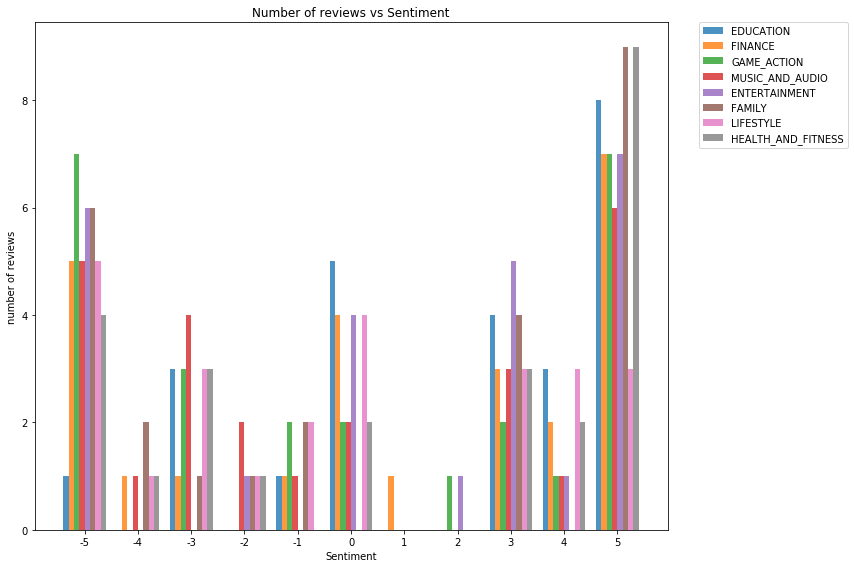

In [60]:
#19. Compare your scores among the app categories. Do you see a difference between app categories?
senm=mychoice1.groupby(["category","Sentiment"]).size().unstack("Sentiment")
senm=senm.to_numpy()
senm=np.nan_to_num(senm)

category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
plt.figure(figsize=(12,8))
index = np.arange(len(senm[0]))
xname=["-5","-4","-3","-2","-1","0","1","2","3","4","5"]
bar_width = 1/10
opacity = 0.8
error_config = {'ecolor': '0.8'}
for i in range(len(senm)):
    rects = plt.bar(index+bar_width*i, senm[i],bar_width, alpha=opacity,
                 yerr=None, error_kw=error_config, label=category[i])
plt.xticks(index + bar_width+0.25, xname)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of reviews vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('number of reviews')
plt.tight_layout()
plt.show()

In [62]:
mychoice1.groupby(["category","Constructive/Detailed"]).size().unstack("Constructive/Detailed")

Constructive/Detailed,0,1,2,3,4,5,6,7,8,9,10
category,,,,,,,,,,,
EDUCATION,12.0,NaN,3.0,2.0,NaN,5.0,1.0,NaN,2.0,NaN,NaN
ENTERTAINMENT,8.0,1.0,NaN,4.0,3.0,2.0,2.0,1.0,1.0,NaN,3.0
FAMILY,8.0,NaN,5.0,4.0,2.0,3.0,NaN,1.0,2.0,NaN,NaN
FINANCE,8.0,1.0,NaN,1.0,4.0,5.0,1.0,NaN,2.0,2.0,1.0
GAME_ACTION,16.0,1.0,1.0,3.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
HEALTH_AND_FITNESS,8.0,NaN,NaN,1.0,1.0,4.0,5.0,3.0,2.0,1.0,NaN
LIFESTYLE,10.0,NaN,1.0,2.0,1.0,2.0,4.0,4.0,1.0,NaN,NaN
MUSIC_AND_AUDIO,11.0,NaN,NaN,4.0,2.0,3.0,1.0,1.0,1.0,NaN,2.0


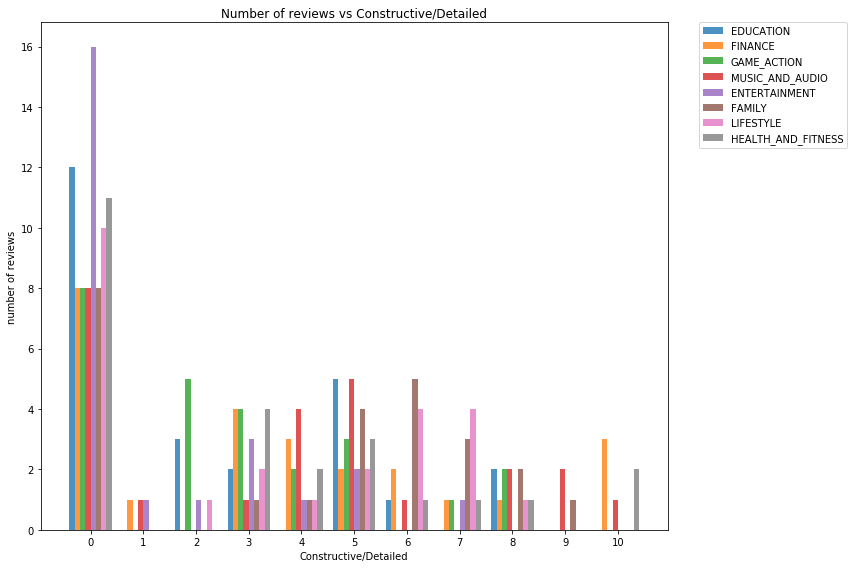

In [63]:
cd=mychoice1.groupby(["category","Constructive/Detailed"]).size().unstack("Constructive/Detailed")
cd=cd.to_numpy()
cd=np.nan_to_num(cd)
category=np.array(["EDUCATION","FINANCE","GAME_ACTION","MUSIC_AND_AUDIO","ENTERTAINMENT","FAMILY","LIFESTYLE","HEALTH_AND_FITNESS"])
plt.figure(figsize=(12,8))
index = np.arange(len(cd[0]))
xname=["0","1","2","3","4","5","6","7","8","9","10"]
bar_width = 1/10
opacity = 0.8
error_config = {'ecolor': '0.8'}
for i in range(len(cd)):
    rects = plt.bar(index+bar_width*i, cd[i],bar_width, alpha=opacity,
                 yerr=None, error_kw=error_config, label=category[i])
plt.xticks(index + bar_width+0.25, xname)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of reviews vs Constructive/Detailed')
plt.xlabel('Constructive/Detailed')
plt.ylabel('number of reviews')
plt.tight_layout()
plt.show()

## Get Ready ... Initial Statistics.

**1. Drop duplicates and record how many unique reviews are collected?**

There are `1478938` unique reviews are collected.

**2. How many unique apps are in the dataset? How many apps in each of the 8 specified app categories?**

There is `87` unique apps.

    EDUCATION             10
    ENTERTAINMENT         14
    FAMILY                10
    FINANCE               10
    GAME_ACTION           11
    HEALTH_AND_FITNESS    10
    LIFESTYLE             12
    MUSIC_AND_AUDIO       11    

**3. How many reviews exist in each of the eight app-categories?**

```   
EDUCATION             137227   
ENTERTAINMENT         226723  
FAMILY                167172   
FINANCE               185512   
GAME_ACTION           252986   
HEALTH_AND_FITNESS    154330    
LIFESTYLE             137751  
MUSIC_AND_AUDIO       217237 
```    

**4. Based on the contentRating column in the details files for each app, what are the different contentRating groups in each app-category?**

```
EDUCATION                               [Everyone]    
ENTERTAINMENT         [Teen, Everyone, Mature 17+]   
FAMILY                    [Everyone 10+, Everyone]    
FINANCE                                 [Everyone]    
GAME_ACTION           [Everyone, Teen, Mature 17+]    
HEALTH_AND_FITNESS                      [Everyone]    
LIFESTYLE             [Everyone, Mature 17+, Teen]    
MUSIC_AND_AUDIO                   [Teen, Everyone]
```

**5. How many apps exist in each of these contentRating-sub-groups in each app-category?**

```
EDUCATION           Everyone         10
ENTERTAINMENT       Everyone          4
                    Mature 17+        1
                    Teen              9
FAMILY              Everyone          7
                    Everyone 10+      3
FINANCE             Everyone         10
GAME_ACTION         Everyone          5
                    Mature 17+        2
                    Teen              4
HEALTH_AND_FITNESS  Everyone         10
LIFESTYLE           Everyone         11
                    Mature 17+        1
                    Teen              1
MUSIC_AND_AUDIO     Everyone          2
                    Teen              9
```

## Text Pre-processing.

**7. Should we remove the reviews that contain two or less number of words?**

**a. Justify your answers.**

In my opinion, we should remove the reviews that contain two or less number of words. Because it is difficult to write a useful review in 2 words. A useful review means the review provides some useful information for the developers to improve the app. It may be just like "Great job.","Good app.". Since we need to handle a large dataset, we should remove them for the convenience.

**b. Can we remove the reviews with two or less words for some score-sub-groups and keep them in the other ones? E.g. if the review has score 1, we should remove such reviews, but we should keep them if the rating is 5. Justify your answers.**

I do not think we need to remove the reviews with two or fewer words for some score-sub-groups and keep them in the other ones. As I wrote in question b, it is difficult to write a useful review in two words. A useful review means the review provides some useful information for the developers to improve the app. For a review in two words with rating 5 will be like "Good app.". And for a review in two words with rating 1 will be like "Bad app". This kind of review is useless for developers to improve the app.

## Analyzing Each Category.

**10. What is the number of reviews for each score (score column)? For example, 35000 reviews have a score of 1, etc.**

```
category            score
EDUCATION           1         8841
                    2         2381
                    3         4447
                    4        10283
                    5        67578
ENTERTAINMENT       1        19091
                    2         5783
                    3         8661
                    4        16446
                    5        76178
FAMILY              1        11948
                    2         3333
                    3         5755
                    4        12217
                    5        76568
FINANCE             1        26248
                    2         4859
                    3         4916
                    4        10457
                    5        77039
GAME_ACTION         1        18098
                    2         3953
                    3         6482
                    4        13046
                    5        85727
HEALTH_AND_FITNESS  1        19181
                    2         6152
                    3         7316
                    4        13374
                    5        62302
LIFESTYLE           1        32518
                    2         4768
                    3         5542
                    4         7568
                    5        36679
MUSIC_AND_AUDIO     1        31716
                    2         9709
                    3        11396
                    4        15354
                    5        70144
```

**11. How many apps exist in each score-sub-group?**

```
EDUCATION           1        10
                    2        10
                    3        10
                    4        10
                    5        10
ENTERTAINMENT       1        14
                    2        14
                    3        14
                    4        14
                    5        14
FAMILY              1        10
                    2        10
                    3        10
                    4        10
                    5        10
FINANCE             1        10
                    2        10
                    3        10
                    4        10
                    5        10
GAME_ACTION         1        11
                    2        11
                    3        11
                    4        11
                    5        11
HEALTH_AND_FITNESS  1        10
                    2        10
                    3        10
                    4        10
                    5        10
LIFESTYLE           1        12
                    2        12
                    3        12
                    4        12
                    5        12
MUSIC_AND_AUDIO     1        11
                    2        11
                    3        11
                    4        11
                    5        11
```

**12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).**

For category education, around 70% users is rating 5, and the smallest percentage is around 2% which is came from rating 2.

For category finace, around 60% users is rating 5, and the smallest percentage is around 5% which is came from rating 2.

For category game_action, around 70% users is rating 5, and the smallest percentage is around 3% which is came from rating 2.

For category music_and_audio, around 60% users is rating 5, and the smallest percentage is around 4% which is came from rating 2.

For category entertainment, around 70% users is rating 5, and the smallest percentage is around 3% which is came from rating 2.

For category family, around 60% users is rating 5, and the smallest percentage is around 6% which is came from rating 2.

For category lifestyle, around 40% users is rating 5, and the smallest percentage is around 5% which is came from rating 2.

For category health_and_fitness, around 50% users is rating 5, and the smallest percentage is around 7% which is came from rating 2.

**13. What is the average length of the reviews in each score-sub-group?**

```
EDUCATION           1        109.378238
                    2        161.391852
                    3        125.079379
                    4        100.471166
                    5         66.014250
ENTERTAINMENT       1        111.040228
                    2        129.094069
                    3        108.132202
                    4         82.181199
                    5         55.396112
FAMILY              1        103.569384
                    2        134.459646
                    3        116.544917
                    4        104.633625
                    5         67.749647
FINANCE             1        158.836788
                    2        150.186870
                    3        124.812449
                    4         79.485703
                    5         55.284804
GAME_ACTION         1         83.861753
                    2        100.581837
                    3         76.729405
                    4         61.135137
                    5         43.644301
HEALTH_AND_FITNESS  1        147.826078
                    2        175.316808
                    3        161.332695
                    4        121.913040
                    5         80.443244
LIFESTYLE           1        115.449044
                    2        147.171770
                    3        124.297005
                    4         89.499604
                    5         59.781128
MUSIC_AND_AUDIO     1        129.478434
                    2        157.247193
                    3        135.698666
                    4         98.036994
                    5         55.906991
```

**14. Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a plot).**

For the score with 1, category music_and_audio has the highest average length of reviews, category entertainment has the lowest average length of reviews.

For the score with 2, category family has the highest average length of reviews, category entertainment has the lowest average length of reviews.

For the score with 3, category family has the highest average length of reviews, category entertainment has the lowest average length of reviews.

For the score with 4, category family has the highest average length of reviews, category entertainment has the lowest average length of reviews.

For the score with 5, category family has the highest average length of reviews, category entertainment has the lowest average length of reviews.

For all categories except music_and_audio, they follow the same tendency: when the score goes up, the mean length of reviews reaches the peak in rating 2, followed by decreasing until hit bottom at score 5. However, the average length of reviews in category music_and_audio decreases along with the score increases. The category family has the highest average range of reviews for rating 2 to 5, with average equals to 175 in score 2, and category entertainment has the lowest average length of reviews all the time. 

**15. Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).**

For score with 1, category education has the lowest number of reviews, and category lifestyle has the highest number of reviews.

For score with 2, category education has the lowest number of reviews, and category health_and_fitness has the highest number of reviews.

For score with 3, category education has the lowest number of reviews, and category health_and_fitness has the highest number of reviews.

For score with 4, category lifestyle has the lowest number of reviews, and category finance has the highest number of reviews.

For score with 5, category lifestyle has the lowest number of reviews, and category entertainment has the highest number of reviews.

All categories have highest number of reviews in score 5 and have lowest number of reviews in score  2.


**16. Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).**

Each app category has same apps number during all score-sub-groups. 

```
category         number in each score-sub-group 
EDUCATION             10
ENTERTAINMENT         14
FAMILY                10
FINANCE               10
GAME_ACTION           11
HEALTH_AND_FITNESS    10
LIFESTYLE             12
MUSIC_AND_AUDIO       11
```

## Correlation Analysis.

**17. Is there any correlation between the length of the reviews and the score in each app-category?**

There is some correlation between the length of the reviews and the score in each app-category. The highest one is -0.432277 appeared in category finance, and others are around -0.3, which are all have low correlation coefficients.

```
category
EDUCATION            -0.216824
ENTERTAINMENT        -0.285170
FAMILY               -0.176173
FINANCE              -0.432277
GAME_ACTION          -0.237993
HEALTH_AND_FITNESS   -0.274127
LIFESTYLE            -0.262165
MUSIC_AND_AUDIO      -0.347001

```


## Date-time Analysis.



**18. Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.**


**a. Can we use the date column for this question?**

In my opinion, we cannot use the date column for this question. Since the date records in the dataset are chaotic, I even can find some 2014 in the date column. I decide to deal with them as mistakes made when putting reviews into csv file since if I choose to deal with them with mistakes made when grabbing from apps and remove all reviews with the wrong dates. There will have some apps removed.

****

**b. If not, what is the solution based on the data you have?** 

I decided to deal with them as mistakes made when putting reviews into csv file. I used the date when the data collected. 

For category education, rating with 3 has higher average length of reviews than others except on 2019-04-07, and rating with 5 has lowest average length of reviews all the time.

For category finance, rating with 3 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For category game_action , rating with 3 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For category music_and_audio , rating with 1 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For category entertainment, rating with 2 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For category family, rating with 2 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For category lifestyle, rating with 2 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For category health_and_fitness, rating with 2 has highest average length of reviews all the time, and rating with 5 has lowest average length of reviews all the time.

For education, rating with 3 has the highest average length of reviews except on April 7th, 2019, a significant margin decline in rating 3 caused rating 2 reaches the first prize in that day. For further details, the average length of reviews is the smallest for all categories when the score is five, and the average length of reviews is largest for half of the categories when the score is 2.

## Manual evaluation.

**19. Compare your scores among the app categories. Do you see a difference between app categories?**

Sentiment:

Most of categories have the highest number of reviews in score 5 except lifestyle. The category lifestyle has the largest number of reviews in rating -5. Most of catrgories also have highest number of reviews in score -5. Most of categories appear the smallest number of reviews in score 1 or 2. Some categories do not appear at score -4,-3,-2,-1,0,1,2,4.

Categories music_and_audio, entertainment，family, education, health_and_fitness, finance and game_action have highest number of reviews in score 5. Category lifestyle has highest number of reviews in score -5.

Categories education, family and game_action have lowest number of reviews in score -4. 

Category game_action have lowest number of reviews in score -3. 

Categories education, entertainment and family have lowest number of reviews in score -2. 

Category game_action have lowest number of reviews in score -1. 

Category health_and_fitness have lowest number of reviews in score 0. 

All categories have lowest in score 1 except entertainment. 

All categories have lowest in score 2 except family and game_action. 

Category health_and_fitness have lowest number of reviews in score 4.


Constructive/Detailed:

All categories have the hugest number of reviews in rating 0 with the entertainment get the first place that means most of the feedbacks are useless. For non zero texts, most of them are moderately useful, which is in rate 5. Some categories do not appear at score 1,2,4,6,7,8,9,10.

Categories music_and_audio, family, education, lifestyle and health_and_fitness have lowest number of reviews in score 1.

Categories entertainment, finance, health_and_fitness and music_and_audio have lowest number of reviews in score 2.

Category education have lowest number of reviews in score 4.

Categories family and game_action have lowest number of reviews in score 6.

Categories education and finance have lowest number of reviews in score 7.

Category game_action have lowest number of reviews in score 8.

Categories education, entertainment, family, game_action, lifestyle, music_and_audio have lowest number of reviews in score 9.

Categories education, family, game_action, lifestyle, and health_and_fitness have lowest number of reviews in score 9.



